The goal here is to find the *W1, b1* constants from the linear model f(x) = *W1*\*x + *b1* 

The training data consists of 500 points sampled from: f(x) = 2\*x + 1 + random_normal\*0.1

For that it is necessary to:
1. nn = neuralnet(...) - define neural network architecture and create neural network
2. nn = init_cloud(N) - Initialize cloud with N particles
3. nn.train(...) - Define the training data, algorithm parameters and start the algorithm

In [1]:
from mlswarm import neuralnet 
from sklearn.model_selection import train_test_split
import numpy as np

#DATASET-------------------------------
N_points = 500
X = np.linspace(0, 2, N_points)
Y = 2 * X + 1 + np.random.randn(*X.shape) * 0.1  
X.resize((N_points,1))
Y.resize((N_points,1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [2]:
nn_architecture = [
    {"input_dim": 1, "output_dim": 1, "activation": "linear"}
]

#CREATE NEURAL NETWORK
nn = neuralnet(nn_architecture)

#INITIALIZE CLOUD WITH 5 PARTICLES ACCORDING TO XAVIER INITIALIZATION
nn.init_cloud(N = 5)

#TRAINING
nn.train(X = X_train, Y = Y_train, 
          method = "swarm_derivfree", 
          max_epochs= 1000, n_batches = 1, batch_size = X_train.shape[0],
          learning_rate = 0.01, var_epsilon = 0.001,
          cost_type = 'rmse',
          kernel_a = 0.01, alpha_init = 0, alpha_rate = 1, beta = 0, gamma = 1, 
          verbose = False)


Training started...
Maximum amount of epochs reached

Function value at cloud mean: 0.011477129355012406
Cost function evaluated 5000 times

The clock time (CPU time) for train_nn was 0.33301 (0.34375) seconds


Test set accuracy using particle 0: 0.02943
Test set accuracy using cloud mean: 0.01069


<Figure size 432x288 with 0 Axes>

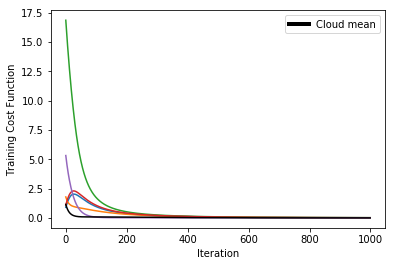

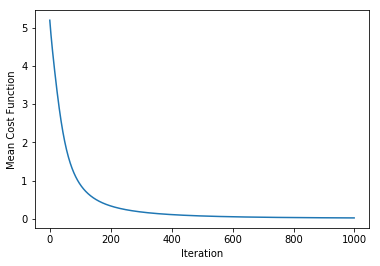

In [3]:
#ACCURACY ON TEST SET USING PARTICLE 0 WEIGHTS
nn.prediction_accuracy_particle(X_test, Y_test, acc_type = 'rmse', particle = 0)

#ACCURACY ON TEST SET USING CLOUD MEAN WEIGHTS
nn.prediction_accuracy_mean_particle(X_test, Y_test, acc_type = 'rmse')

#PLOT COST HISTORY
nn.plot_cost_history()

In [4]:
#GET CLOUD MEAN PARAMETERS
print(nn.get_cloud_mean())

{'W1': array([[2.07193563]]), 'b1': array([[0.92598664]])}
